In [1]:
__author__ = "CHEN CHEN"
__studentID__ = "18M15221"
__date__ = "2018/07/14"

"""
Problem 1 source code

Including the implementation of Logistic Regression by the steepest gradient method and the Newton based method.

"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LogisticRegressionGD:
    """
    Implementation of Logistic Regression based on gradient descent for Problem 1

    :param lam: float, default: 0.001
                 Lambda as the  parameter of the regularization. larger values specify stronger regularization.

    :param lr: float, default: 0.02
                Learning rate of the gradient descent.

    :param iter: int, default: 2000
                  Iterations of the training.

    """
    def __init__(self, w=None, lam=0.001, lr=0.02, iter=2000):
        self.w = w
        self.lam = lam
        self.lr = lr
        self.iter = iter
        self.train_loss = []

    def prob(self, x, y):
        """
        Sigmoid function to calculate the probability of input samples

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return: int/array_like,
                   Probability defined by sigmoid function.
        """
        assert self.w is not None, "Call fit() to train the model firstly"
        return 1/(1+np.exp(-y*x.dot(self.w)))

    def loss(self, x, y, w=None):
        """
        Loss function also expressed as J(w)

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :param w: array_like, shape(n_features)
                   Weight array.

        :return:  array_like,
                   Loss calculated at the input samples associated with the current weight w.
        """
        if w is None:
            assert self.w is not None, "Call fit() to train the model firstly"
            w = self.w
        return np.average(-np.log(self.prob(x, y))) + self.lam*w.dot(w)

    def gradient(self, x, y, w):
        """
        Gradient of the current weight w.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :param w: array_like, shape(n_features)
                   Weight array.

        :return:  int/array_like,
                   Gradient calculated at the input samples associated with the current weight w.
        """
        return np.average((1 - self.prob(x, y))*(-x.T*y), axis=1) + 2*self.lam*w

    def fit(self, x, y):
        """
        Main routine of the model by fitting the given training data using GD.
        The details will be discussed in the report.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return:  None
        """
        _, d = x.shape
        self.w = np.zeros(d)
        for _ in range(self.iter):
            self.train_loss.append(self.loss(x, y, self.w))
            self.w -= self.lr * self.gradient(x, y, self.w)

    def visualize(self):
        """
        Visualize the loss J(w) w.r.t the iteration.

        :return: None
        """
        assert self.train_loss, "Call fit() to train the model firstly"
        plt.figure(figsize=(8, 8))
        plt.plot(np.arange(self.iter), self.train_loss, c="b", label="Train Loss")
        plt.xlabel("iteration")
        plt.ylabel("J(w)")
        plt.legend()
        # plt.savefig(f"{self.__class__.__name__}.pdf")
        plt.show()

    def indicator(self, x, w=None):
        """
        Indicator function which classifier the input samples.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param w: array_like, shape(n_features)
                   Weight array.

        :return: int/array_like
                   Label of the input samples.
        """
        if w is None:
            assert self.w is not None, "Call fit() to train the model firstly"
            w = self.w
        return np.heaviside(x.dot(w), 0)

    def predict(self, x):
        assert self.w is not None, "Call fit() to train the model firstly"
        return 2*self.indicator(x, self.w) - 1

In [3]:
class LogisticRegressionNewton(LogisticRegressionGD):
    """
    Implementation of Logistic Regression based on Newton method  for Problem 1

    Parameters:
        lam: float, default: 0.001
            Lambda as the  parameter of the regularization. larger values specify stronger regularization.

        lr: float, default: 0.02
            Learning rate of the gradient descent.

        iter: int, default: 2000
            Iterations of the training.

    """
    def __init__(self, w=None, lam=0.001, lr=0.02, iter=2000):
        super().__init__(w, lam, lr, iter)

    def hessian_matrix(self, x, y):
        """
        Hessian matrix.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return:  array_like,
                   Hessian matrix.
        """
        return x.T.dot(np.diag((1-self.prob(x, y))*self.prob(x, y))).dot(x) / x.shape[0] + 2*self.lam*np.eye(x.shape[1])

    def fit(self, x, y):
        """
        Main routine of the model by fitting the given training data using Newton method.
        The details will be discussed in the report.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return:  None
        """
        _, d = x.shape
        self.w = np.zeros(d)
        for _ in range(self.iter):
            self.train_loss.append(self.loss(x, y, self.w))
            self.w -= self.lr * np.linalg.inv(self.hessian_matrix(x, y)).dot(self.gradient(x, y, self.w))

In [4]:
# set seed
np.random.seed(15221)

# generate dataset 2
n = 40
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = omega*x[:, 0].reshape(-1, 1) + x[:, 1].reshape(-1, 1) + noise
y = (2*np.heaviside(y, 0) - 1)[:, 0]

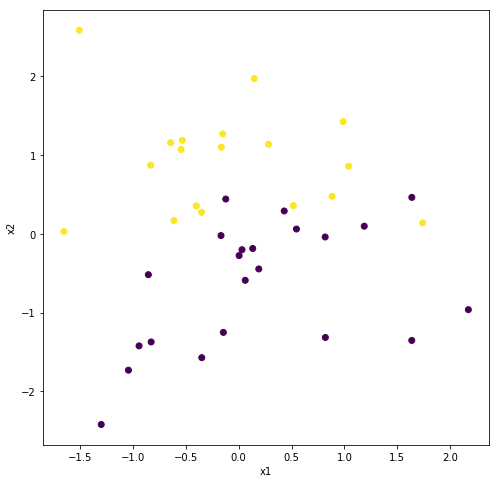

In [5]:
# plot the dataset 2
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
# plt.savefig("Dataset2.pdf")
plt.show()

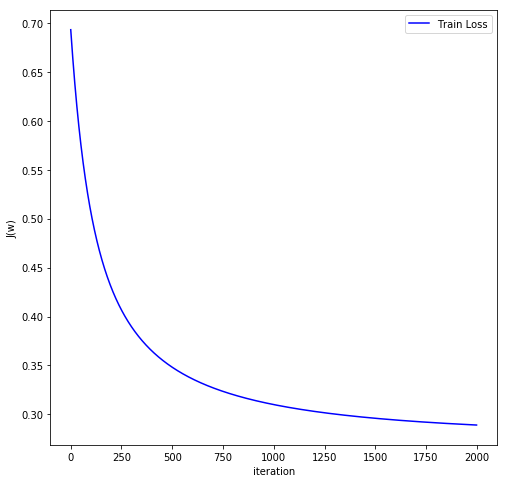

In [6]:
# train LogisticRegressionGD model
clf1 = LogisticRegressionGD()
clf1.fit(x, y)
clf1.visualize()

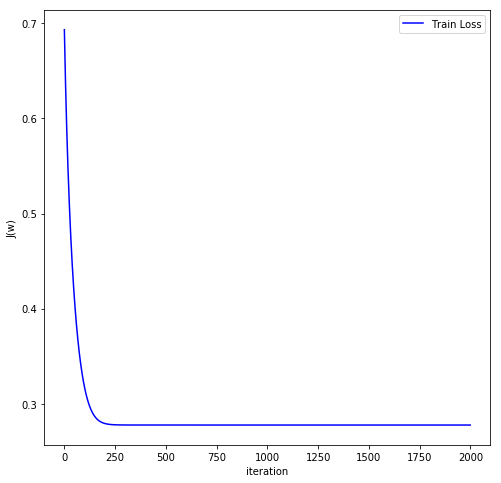

In [7]:
# train LogisticRegressionNewton model
clf2 = LogisticRegressionNewton()
clf2.fit(x, y)
clf2.visualize()

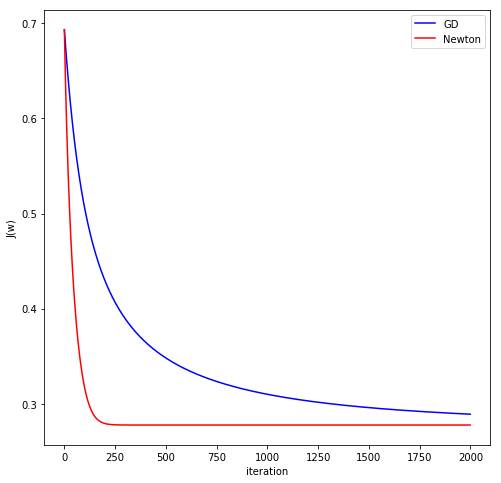

In [8]:
# compare the performance of the steepest gradient method and Newton based method
plt.figure(figsize=(8, 8))
plt.plot(np.arange(clf1.iter), clf1.train_loss, c="b", label="GD")
plt.plot(np.arange(clf1.iter), clf2.train_loss, c="r", label="Newton")
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.legend()
# plt.savefig("compare.pdf")
plt.show()